# Day 4: Exercises from the course "Machine Vision using Python (MVUP01)"

**Sessions**: (7) Building Deep Learning Models with TensorFlow/Keras; (8) Image Processing with OpenCV: Filters, Edge Detection & Contours.

**Instructor**: Gabriel Rodrigues Palma

**Objective**: This day introduces participants to the core libraries used in machine vision tasks. OpenCV is used for image processing, and TensorFlow is used for building deep learning models.

# Sessionn 8: Image Processing with OpenCV: Filters, Edge Detection & Contours.

In [6]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [7]:
!ls

Day4_ TensorFlow.ipynb Day4_TensorFlow.ipynb
Day4_OpenCV.ipynb      input_data


In [12]:
cap = cv.VideoCapture('input_data/Vision/podisusSpodoptera.mp4')

In [13]:
experiment_scene = cv.imread('input_data/Vision/scene.jpg')
experiment_scene = cv.cvtColor(experiment_scene, cv.COLOR_BGR2GRAY)
experiment_scene = cv.GaussianBlur(experiment_scene, (5,5), 0)
thresh = cv.adaptiveThreshold(experiment_scene, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 65, 43)

In [14]:
cv.startWindowThread()
cv.imshow('Experiment scene', experiment_scene)
cv.waitKey()
cv.imshow('Threshold', thresh)
cv.waitKey()
cv.destroyAllWindows()
cv.waitKey(1)

2025-02-06 02:04:13.802 python3[6880:83137] +[IMKClient subclass]: chose IMKClient_Modern
2025-02-06 02:04:13.802 python3[6880:83137] +[IMKInputSession subclass]: chose IMKInputSession_Modern


-1

# Blob detection

In [23]:
# Set up the SimpleBlobdetector with default parameters.
params = cv.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 0
params.maxThreshold = 256

# Filter by Area.
params.filterByArea = True
params.minArea = 1
params.maxArea = 10000

# Filter by Color (black=0)
params.filterByColor = True
params.blobColor = 0

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1
params.maxCircularity = 1

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.1
params.maxConvexity = 1

# Filter by InertiaRatio
# Filter by InertiaRatio
params.filterByInertia = True
params.minInertiaRatio = 0.01
params.maxInertiaRatio = 1

# Distance Between Blobs
params.minDistBetweenBlobs = 0.9


# Do detecting
detector = cv.SimpleBlobDetector_create(params)

In [36]:
while(cap.isOpened()):
    ret, frame = cap.read()
 
 
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 65, 43)
    keypoints = detector.detect(thresh)
    
    blobs = cv.drawKeypoints(frame, keypoints, np.array([]), (0,0,255), cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    cv.imshow('frame', blobs)
 
    if cv.waitKey(1) & 0xFF == ord('q'):
        cv.destroyAllWindows()
        cv.waitKey(1)
        break 

cap.release()

# Frame Substraction

In [37]:
cap = cv.VideoCapture('input_data/Vision/podisusSpodoptera.mp4')

In [38]:
#backSub = cv.createBackgroundSubtractorMOG2()
backSub = cv.createBackgroundSubtractorKNN()

In [42]:
while True:
    ret, frame = cap.read()
    if frame is None:
        break
    
    fgMask = backSub.apply(frame)
    
    
    cv.rectangle(frame, (10, 2), (100,20), (255,255,255), -1)
    cv.putText(frame, str(cap.get(cv.CAP_PROP_POS_FRAMES)), (15, 15),
               cv.FONT_HERSHEY_SIMPLEX, 0.5 , (0,0,0))
    
    
    cv.imshow('Frame', frame)
    cv.imshow('FG Mask', fgMask)
    
    keyboard = cv.waitKey(30)
    if keyboard == 'q' or keyboard == 27:
        cv.destroyAllWindows()
        cv.waitKey(1)
        break


# Template Matching

In [44]:
experiment_scene = cv.imread('input_data/Vision/scene.png')
spodoptera_H = cv.imread('input_data/Vision/spodopteraH.png')
spodoptera_V = cv.imread('input_data/Vision/spodopteraV.png')
podisus = cv.imread('input_data/Vision/podisus.png')

In [45]:
cv.startWindowThread()
cv.imshow('Experiment scene', experiment_scene)
cv.waitKey(0)
cv.imshow('Spodoptera horizontal view', spodoptera_H)
cv.waitKey(0)
cv.imshow('Spodoptera vertical view', spodoptera_V)
cv.waitKey(0)
cv.imshow('Podisus view', podisus)
cv.waitKey(0)
cv.destroyAllWindows()
cv.waitKey(1)

-1

In [46]:
scene_spodopteraH_result = cv.matchTemplate(experiment_scene, spodoptera_H, cv.TM_CCOEFF_NORMED)
scene_spodopteraV_result = cv.matchTemplate(experiment_scene, spodoptera_V, cv.TM_CCOEFF_NORMED)
scene_podisus_result = cv.matchTemplate(experiment_scene, podisus, cv.TM_CCOEFF_NORMED)

In [47]:
cv.imshow('Template matching with spodoptera horizontal view', scene_spodopteraH_result)
cv.waitKey(0)
cv.imshow('Template matching with spodoptera vertical view', scene_spodopteraV_result)
cv.waitKey(0)
cv.imshow('Template matching with podisus view', scene_podisus_result)
cv.waitKey(0)
cv.destroyAllWindows()
cv.waitKey(1)

-1

In [48]:
spodopteraH_Best_loc = cv.minMaxLoc(scene_spodopteraH_result)[3]
spodopteraV_Best_loc = cv.minMaxLoc(scene_spodopteraV_result)[3]
podisus_Best_loc = cv.minMaxLoc(scene_podisus_result)[3]

In [49]:
spodoptera_V_width = spodoptera_V.shape[1]
spodoptera_V_heigth = spodoptera_V.shape[0]
spodoptera_H_width = spodoptera_H.shape[1]
spodoptera_H_heigth = spodoptera_H.shape[0]
podisus_width = podisus.shape[1]
podisus_heigth = podisus.shape[0]

In [50]:
cv.rectangle(experiment_scene, spodopteraV_Best_loc, (spodopteraV_Best_loc[0] + spodoptera_V_width,
                                                     spodopteraV_Best_loc[1] + spodoptera_V_heigth), 
             (0, 255, 255), 2)

array([[[154, 157, 158],
        [155, 158, 159],
        [129, 133, 134],
        ...,
        [197, 197, 196],
        [  7,   7,   7],
        [168, 169, 169]],

       [[172, 174, 176],
        [170, 173, 174],
        [150, 154, 155],
        ...,
        [195, 195, 196],
        [  9,   9,   9],
        [168, 168, 168]],

       [[215, 215, 217],
        [213, 215, 215],
        [205, 206, 208],
        ...,
        [194, 195, 195],
        [  7,   7,   7],
        [169, 169, 169]],

       ...,

       [[211, 210, 211],
        [209, 209, 210],
        [196, 196, 199],
        ...,
        [194, 193, 194],
        [  2,   1,   1],
        [ 24,  24,  22]],

       [[209, 209, 210],
        [208, 208, 209],
        [197, 198, 198],
        ...,
        [192, 192, 192],
        [  1,   1,   1],
        [ 24,  23,  22]],

       [[207, 208, 209],
        [207, 207, 209],
        [198, 197, 199],
        ...,
        [192, 194, 193],
        [  1,   1,   1],
        [ 24,  23,  22]]

In [51]:
cv.startWindowThread()
cv.imshow('Experiment scene', experiment_scene)
cv.waitKey(0)
cv.destroyAllWindows()
cv.waitKey(1)

-1

In [52]:
cv.rectangle(experiment_scene, spodopteraH_Best_loc, (spodopteraH_Best_loc[0] + spodoptera_H_width,
                                                     spodopteraH_Best_loc[1] + spodoptera_H_heigth), 
             (0, 255, 255), 2)

array([[[154, 157, 158],
        [155, 158, 159],
        [129, 133, 134],
        ...,
        [197, 197, 196],
        [  7,   7,   7],
        [168, 169, 169]],

       [[172, 174, 176],
        [170, 173, 174],
        [150, 154, 155],
        ...,
        [195, 195, 196],
        [  9,   9,   9],
        [168, 168, 168]],

       [[215, 215, 217],
        [213, 215, 215],
        [205, 206, 208],
        ...,
        [194, 195, 195],
        [  7,   7,   7],
        [169, 169, 169]],

       ...,

       [[211, 210, 211],
        [209, 209, 210],
        [196, 196, 199],
        ...,
        [194, 193, 194],
        [  2,   1,   1],
        [ 24,  24,  22]],

       [[209, 209, 210],
        [208, 208, 209],
        [197, 198, 198],
        ...,
        [192, 192, 192],
        [  1,   1,   1],
        [ 24,  23,  22]],

       [[207, 208, 209],
        [207, 207, 209],
        [198, 197, 199],
        ...,
        [192, 194, 193],
        [  1,   1,   1],
        [ 24,  23,  22]]

In [53]:
cv.startWindowThread()
cv.imshow('Experiment scene', experiment_scene)
cv.waitKey(0)
cv.destroyAllWindows()
cv.waitKey(1)

-1

In [54]:
cv.rectangle(experiment_scene, podisus_Best_loc, (podisus_Best_loc[0] + podisus_width,
                                                  podisus_Best_loc[1] + podisus_heigth), 
             (0, 255, 255), 2)

array([[[154, 157, 158],
        [155, 158, 159],
        [129, 133, 134],
        ...,
        [197, 197, 196],
        [  7,   7,   7],
        [168, 169, 169]],

       [[172, 174, 176],
        [170, 173, 174],
        [150, 154, 155],
        ...,
        [195, 195, 196],
        [  9,   9,   9],
        [168, 168, 168]],

       [[215, 215, 217],
        [213, 215, 215],
        [205, 206, 208],
        ...,
        [194, 195, 195],
        [  7,   7,   7],
        [169, 169, 169]],

       ...,

       [[211, 210, 211],
        [209, 209, 210],
        [196, 196, 199],
        ...,
        [194, 193, 194],
        [  2,   1,   1],
        [ 24,  24,  22]],

       [[209, 209, 210],
        [208, 208, 209],
        [197, 198, 198],
        ...,
        [192, 192, 192],
        [  1,   1,   1],
        [ 24,  23,  22]],

       [[207, 208, 209],
        [207, 207, 209],
        [198, 197, 199],
        ...,
        [192, 194, 193],
        [  1,   1,   1],
        [ 24,  23,  22]]

In [71]:
cv.startWindowThread()
cv.imshow('Experiment scene', experiment_scene)
cv.waitKey(0)
cv.destroyAllWindows()
cv.waitKey(1)

-1

In [87]:
# Import required libraries
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

###############################################
# Utility function for displaying images
# (Press any key on the window to continue)
###############################################
def show_image(window_name, image, wait=0):
    cv.imshow(window_name, image)
    cv.waitKey(wait)
    cv.destroyAllWindows()
    cv.waitKey(1)

###############################################
# IMAGE PREPROCESSING EXAMPLE
###############################################
def image_preprocessing():
    """
    This function demonstrates basic image preprocessing:
      - Loading an image
      - Converting it to grayscale (reduces complexity)
      - Applying Gaussian blur (to reduce noise)
      - Using adaptive thresholding (for local binarization)
    
    Adaptive thresholding is useful when lighting conditions vary
    across the image, as it computes the threshold for small regions.
    """
    # Load the scene image (change the path if needed)
    img = cv.imread('input_data/Vision/scene.jpg')
    if img is None:
        print("Error: scene.jpg not found")
        return

    # Convert the image to grayscale
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Apply Gaussian Blur to reduce noise and detail
    blurred = cv.GaussianBlur(gray, (5, 5), 0)

    # Adaptive thresholding: each local region gets its own threshold
    # Here, ADAPTIVE_THRESH_MEAN_C computes the mean of neighbourhood minus a constant
    thresh = cv.adaptiveThreshold(blurred, 255,
                                  cv.ADAPTIVE_THRESH_MEAN_C,
                                  cv.THRESH_BINARY, 65, 43)

    print("Displaying Adaptive Thresholding result...")
    show_image('Adaptive Threshold', thresh)

###############################################
# BLOB DETECTION EXAMPLE
###############################################
def blob_detection():
    """
    This function demonstrates blob detection on video frames.
    A blob is a group of connected pixels that share common properties,
    such as brightness or color. This technique can be useful in detecting
    small organisms or features in biological videos.
    """
    # Open the video file (change path as needed)
    cap = cv.VideoCapture('input_data/Vision/podisusSpodoptera.mp4')
    if not cap.isOpened():
        print("Error: Could not open video file")
        return

    # Set up the blob detector parameters for detecting dark blobs
    params = cv.SimpleBlobDetector_Params()
    params.minThreshold = 0         # Minimum intensity to start detection
    params.maxThreshold = 256       # Maximum intensity to consider

    # Filter blobs by area: helps ignore noise and too-small objects
    params.filterByArea = True
    params.minArea = 1
    params.maxArea = 10000

    # Filter by color (here, looking for dark blobs since blobColor = 0)
    params.filterByColor = True
    params.blobColor = 0

    # Filter by circularity: many biological objects are roughly circular
    params.filterByCircularity = True
    params.minCircularity = 0.1
    params.maxCircularity = 1

    # Filter by convexity: measures how convex (round) the shape is.
    params.filterByConvexity = True
    params.minConvexity = 0.1
    params.maxConvexity = 1

    # Filter by inertia ratio: linked with elongation of the object.
    params.filterByInertia = True
    params.minInertiaRatio = 0.01
    params.maxInertiaRatio = 1

    # Ensure there is some distance between individual blobs
    params.minDistBetweenBlobs = 0.9

    # Create the blob detector with these parameters
    detector = cv.SimpleBlobDetector_create(params)

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert frame to grayscale
        gray_frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

        # Use adaptive thresholding to segment the blobs from background
        thresh_frame = cv.adaptiveThreshold(gray_frame, 255,
                                            cv.ADAPTIVE_THRESH_MEAN_C,
                                            cv.THRESH_BINARY, 65, 43)

        # Detect blobs based on the thresholded image
        keypoints = detector.detect(thresh_frame)

        # Draw detected blobs on the original frame
        blobs = cv.drawKeypoints(frame, keypoints, np.array([]),
                                 (0, 0, 255),
                                 cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

        cv.imshow('Blob Detection', blobs)
        if cv.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv.destroyAllWindows()
    cv.waitKey(1)

###############################################
# FRAME SUBTRACTION EXAMPLE
###############################################
def frame_subtraction():
    """
    Frame subtraction (or background subtraction) extracts moving objects 
    from a video stream by modeling the background and subtracting it from
    each frame. This is useful for motion detection in animal monitoring.
    """
    cap = cv.VideoCapture('input_data/Vision/podisusSpodoptera.mp4')
    if not cap.isOpened():
        print("Error: Could not open video file")
        return

    # Using KNN background subtractor (alternative is MOG2)
    backSub = cv.createBackgroundSubtractorKNN()

    while True:
        ret, frame = cap.read()
        if not ret or frame is None:
            break

        # Apply background subtraction to obtain the foreground mask
        fgMask = backSub.apply(frame)

        # Overlay a frame counter on the video for reference
        cv.rectangle(frame, (10, 2), (100, 20), (255, 255, 255), -1)
        cv.putText(frame, f"Frame: {cap.get(cv.CAP_PROP_POS_FRAMES):.0f}",
                   (15, 15), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))

        cv.imshow('Original Frame', frame)
        cv.imshow('Foreground Mask', fgMask)
        if cv.waitKey(30) & 0xFF in [ord('q'), 27]:  # Quit on 'q' or ESC key
            break

    cap.release()
    cv.destroyAllWindows()
    cv.waitKey(1)

###############################################
# TEMPLATE MATCHING EXAMPLE
###############################################
def template_matching():
    """
    Template matching finds a smaller image (template) within a larger image (scene)
    by sliding the template over the scene and comparing. This is particularly useful
    for detecting known animal or insect patterns in field photos.
    """
    # Load the larger scene image and template images
    scene = cv.imread('input_data/Vision/scene.png')
    template_h = cv.imread('input_data/Vision/spodopteraH.png')
    template_v = cv.imread('input_data/Vision/spodopteraV.png')
    template_p = cv.imread('input_data/Vision/podisus.png')

    if scene is None:
        print("Error: scene.png not found")
        return

    # Convert scene to grayscale (template matching works on intensity values)
    scene_gray = cv.cvtColor(scene, cv.COLOR_BGR2GRAY)
    
    # Convert each template to grayscale too
    templates = {
        "Spodoptera Horizontal": cv.cvtColor(template_h, cv.COLOR_BGR2GRAY),
        "Spodoptera Vertical": cv.cvtColor(template_v, cv.COLOR_BGR2GRAY),
        "Podisus": cv.cvtColor(template_p, cv.COLOR_BGR2GRAY)
    }
    
    # Dictionary to hold template sizes and best match locations
    for name, templ in templates.items():
        result = cv.matchTemplate(scene_gray, templ, cv.TM_CCOEFF_NORMED)
        # cv.minMaxLoc returns the minimum and maximum values and locations in the result map.
        _, max_val, _, max_loc = cv.minMaxLoc(result)
        h, w = templ.shape[:2]
        print(f"Best match for {name} with value {max_val:.2f} found at {max_loc}")
        cv.rectangle(scene, max_loc, (max_loc[0] + w, max_loc[1] + h), (0, 255, 255), 2)

    show_image("Template Matching Result", scene)

###############################################
# ADDITIONAL TECHNIQUES INTERESTING TO BIOLOGISTS
###############################################

def edge_detection():
    """
    Canny edge detection highlights the edges within an image by detecting intensity
    gradients. In biological imaging, this is useful for outlining cell boundaries
    or recognizing structures.
    """
    img = cv.imread('input_data/Vision/scene.jpg')
    if img is None:
        print("Error: scene.jpg not found")
        return

    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # The thresholds can be tuned to detect desired edges
    edges = cv.Canny(gray, threshold1=50, threshold2=150)
    show_image("Canny Edge Detection", edges)

def histogram_equalization():
    """
    Histogram equalization improves the contrast in an image by spreading
    out the most frequent intensity values. This is especially important for
    enhancing details in underexposed or overexposed biological images.
    """
    img = cv.imread('input_data/Vision/scene.jpg')
    if img is None:
        print("Error: scene.jpg not found")
        return

    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    equalized = cv.equalizeHist(gray)
    
    cv.imshow("Original Grayscale", gray)
    cv.imshow("Histogram Equalized", equalized)
    cv.waitKey(0)
    cv.destroyAllWindows()
    cv.waitKey(1)

def contour_detection():
    """
    Contour detection finds the outlines of shapes in a binary image.
    This technique can help in quantifying the size and shape of 
    biological structures, such as cells or insect body parts.
    """
    img = cv.imread('input_data/Vision/scene.jpg')
    if img is None:
        print("Error: scene.jpg not found")
        return

    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Convert the image to binary using a fixed threshold
    ret, thresh = cv.threshold(gray, 127, 255, cv.THRESH_BINARY)
    # Find external contours in the binary image
    contours, hierarchy = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    cv.drawContours(img, contours, -1, (0, 255, 0), 2)
    show_image("Contour Detection", img)

# Import required libraries
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

###############################################
# WATER-SHED SEGMENTATION
###############################################
def watershed_segmentation():
    """
    Watershed segmentation treats a grayscale image as a topographic surface,
    where intensity represents elevation. This method helps separate 
    overlapping or touching objects (e.g., clustered cells) by identifying 
    the "watershed lines" between regions.
    """
    # Load image
    img = cv.imread('input_data/Vision/scene.jpg')
    if img is None:
        print("Error: scene.jpg not found")
        return

    # Convert to grayscale and apply thresholding
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
    
    # Noise removal with morphological opening (erosion followed by dilation)
    kernel = np.ones((3,3), np.uint8)
    opening = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel, iterations=2)
    
    # Identify sure background area by dilation
    sure_bg = cv.dilate(opening, kernel, iterations=3)
    
    # Identify sure foreground using distance transform and thresholding
    dist_transform = cv.distanceTransform(opening, cv.DIST_L2, 5)
    ret, sure_fg = cv.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)
    
    # Find unknown regions (region between sure background and sure foreground)
    unknown = cv.subtract(sure_bg, sure_fg)
    
    # Marker labelling: each connected component gets a label
    ret, markers = cv.connectedComponents(sure_fg)
    markers = markers + 1  # ensure background is not 0
    markers[unknown == 255] = 0  # mark unknown regions as 0

    # Apply the watershed algorithm; boundaries will be marked with -1
    markers = cv.watershed(img, markers)
    img[markers == -1] = [0, 0, 255]  # highlight boundaries with red color
    
    show_image("WaterShed Segmentation", img)


###############################################
# MORPHOLOGICAL OPERATIONS
###############################################
def morphological_operations():
    """
    Morphological operations are used to process images based on their shape.
    They are particularly useful for noise removal and improving the segmentation
    of objects (e.g., cells). Here, we demonstrate erosion, dilation, opening, and closing.
    """
    img = cv.imread('input_data/Vision/scene.jpg', 0)
    if img is None:
        print("Error: scene.jpg not found")
        return
    
    # Define a kernel for morphological processing
    kernel = np.ones((5,5), np.uint8)
    
    # Erosion: removes the outer boundaries, useful for eliminating small noise
    erosion = cv.erode(img, kernel, iterations=1)
    
    # Dilation: adds pixels to the boundaries, useful to accentuate features
    dilation = cv.dilate(img, kernel, iterations=1)
    
    # Opening: erosion followed by dilation; minimizes noise while retaining object shape
    opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
    
    # Closing: dilation followed by erosion; fills small holes within objects
    closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
    
    # Use matplotlib to display results in one figure
    plt.figure(figsize=(10,8))
    plt.subplot(2,2,1), plt.imshow(erosion, cmap='gray'), plt.title('Erosion')
    plt.subplot(2,2,2), plt.imshow(dilation, cmap='gray'), plt.title('Dilation')
    plt.subplot(2,2,3), plt.imshow(opening, cmap='gray'), plt.title('Opening')
    plt.subplot(2,2,4), plt.imshow(closing, cmap='gray'), plt.title('Closing')
    plt.tight_layout()
    plt.show()

###############################################
# IMAGE DENOISING
###############################################
def image_denoising():
    """
    Image denoising enhances the quality of an image by reducing random noise 
    while preserving details. The non-local means method (fastNlMeansDenoisingColored) 
    is effective for colored images, which is valuable for improving images captured
    under suboptimal conditions in biological experiments.
    """
    img = cv.imread('input_data/Vision/scene.jpg')
    if img is None:
        print("Error: scene.jpg not found")
        return

    # Apply Non-local Means Denoising
    denoised = cv.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)
    show_image("Image Denoising", denoised)



In [59]:
# Run image preprocessing demonstration
image_preprocessing()

Displaying Adaptive Thresholding result...


In [63]:
# Run blob detection on video frames
blob_detection()

In [64]:
# Run frame subtraction (motion detection) on video frames
frame_subtraction()
    

In [65]:
# Run template matching demonstration
template_matching()

Best match for Spodoptera Horizontal with value 0.77 found at (451, 830)
Best match for Spodoptera Vertical with value 1.00 found at (600, 504)
Best match for Podisus with value 1.00 found at (778, 400)


In [66]:
# Edge detection using the Canny algorithm
edge_detection()


In [67]:
# Enhance contrast with histogram equalization
histogram_equalization()

In [68]:
# Detect contours to measure object shapes
contour_detection()

In [74]:
# Watershed segmentation to separate overlapping objects (e.g., cells)
watershed_segmentation()

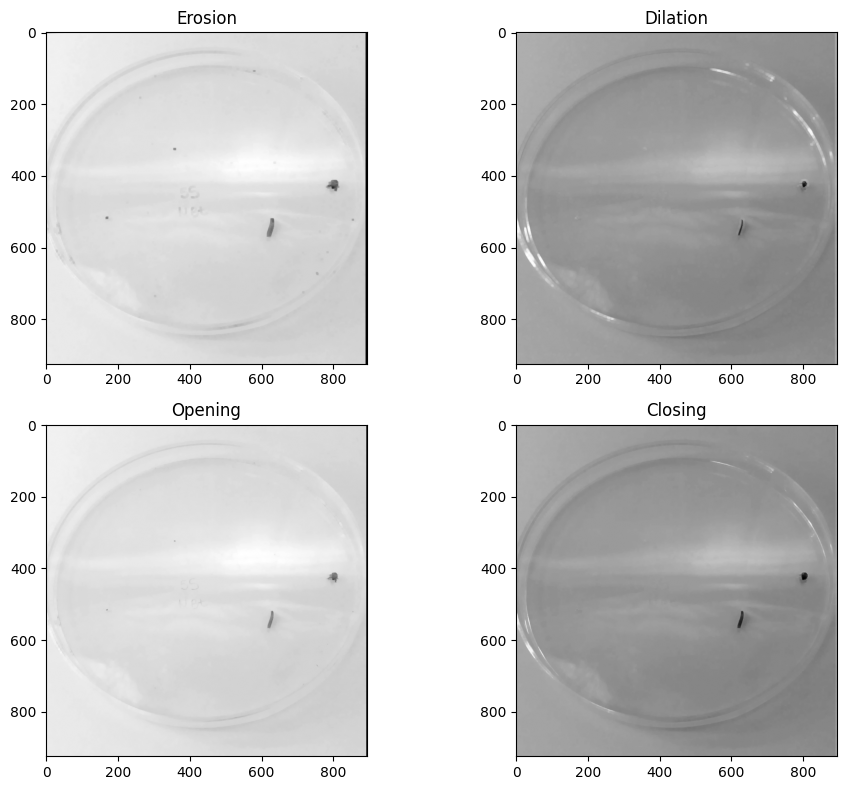

In [76]:
# Morphological operations to remove noise and emphasize structures
morphological_operations()

In [77]:
# Image denoising to reduce noise from low-light or complex backgrounds
image_denoising()